## Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer

## Set filenames

In [2]:
vendors=pd.read_csv("Data/vendors.csv")

## Vendor details

In [3]:
vendors #vendors that customers can order from

,id,authentication_id,latitude,longitude,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,...,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at,updated_at,device_type,display_orders
0,4,118597.0,-0.588596,0.754434,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,...,1.0,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1
1,13,118608.0,-0.471654,0.744470,Restaurants,2.0,0.7,5.0,1.0,08:30AM-10:30PM,...,1.0,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",Y,1.0,1.0,2018-05-03 12:32:06,2020-04-05 20:46:03,3,1
2,20,118616.0,-0.407527,0.643681,Restaurants,2.0,0.0,8.0,1.0,08:00AM-10:45PM,...,1.0,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",Y,1.0,1.0,2018-05-04 22:28:22,2020-04-07 16:35:55,3,1
3,23,118619.0,-0.585385,0.753811,Restaurants,2.0,0.0,5.0,1.0,10:59AM-10:30PM,...,1.0,"5,8,30,24","Burgers,Desserts,Fries,Salads",Y,1.0,1.0,2018-05-06 19:20:48,2020-04-02 00:56:17,3,1
4,28,118624.0,0.480602,0.552850,Restaurants,2.0,0.7,15.0,1.0,11:00AM-11:45PM,...,1.0,5,Burgers,Y,1.0,1.0,2018-05-17 22:12:38,2020-04-05 15:57:41,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,849,130455.0,-1.588060,-0.066441,Restaurants,2.0,0.0,10.0,1.0,NaN,...,1.0,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",Y,1.0,1.0,2019-12-21 12:47:39,2020-04-07 20:01:33,3,1
96,855,130463.0,2.145206,0.745025,Restaurants,2.0,0.0,8.0,1.0,NaN,...,1.0,"1,5,8,91,30,48,24","American,Burgers,Desserts,Free Delivery,Fries,...",Y,1.0,1.0,2019-12-21 13:02:32,2020-04-07 01:50:41,3,1
97,856,130464.0,0.251469,0.483632,Restaurants,2.0,0.0,7.0,1.0,NaN,...,1.0,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",Y,1.0,1.0,2019-12-21 13:04:34,2020-04-06 23:53:16,3,1
98,858,130468.0,0.019817,0.587087,Restaurants,2.0,0.0,3.0,1.0,NaN,...,1.0,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",Y,1.0,1.0,2019-12-21 13:12:09,2020-04-07 14:26:08,3,1


In [4]:
vendors.columns.values

array(['id', 'authentication_id', 'latitude', 'longitude',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'OpeningTime', 'OpeningTime2',
       'prepration_time', 'commission', 'is_akeed_delivering',
       'discount_percentage', 'status', 'verified', 'rank', 'language',
       'vendor_rating', 'sunday_from_time1', 'sunday_to_time1',
       'sunday_from_time2', 'sunday_to_time2', 'monday_from_time1',
       'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
       'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2',
       'tuesday_to_time2', 'wednesday_from_time1', 'wednesday_to_time1',
       'wednesday_from_time2', 'wednesday_to_time2',
       'thursday_from_time1', 'thursday_to_time1', 'thursday_from_time2',
       'thursday_to_time2', 'friday_from_time1', 'friday_to_time1',
       'friday_from_time2', 'friday_to_time2', 'saturday_from_time1',
       'saturday_to_time1', 'saturday_from_time2', 'saturday

In [5]:
#Renaming some vendors columns
vendors=vendors.rename(columns={'latitude':'ven_latitude','longitude':'ven_longitude','id':'vendor_id',
                                'country_id':'ven_country_id','created_at':'ven_created_at',
                                'updated_at':'ven_updated_at','status':'ven_status','verified':'ven_verified',
                                'city_id':'ven_city_id'})

In [6]:
vendors.columns.values

array(['vendor_id', 'authentication_id', 'ven_latitude', 'ven_longitude',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'OpeningTime', 'OpeningTime2',
       'prepration_time', 'commission', 'is_akeed_delivering',
       'discount_percentage', 'ven_status', 'ven_verified', 'rank',
       'language', 'vendor_rating', 'sunday_from_time1',
       'sunday_to_time1', 'sunday_from_time2', 'sunday_to_time2',
       'monday_from_time1', 'monday_to_time1', 'monday_from_time2',
       'monday_to_time2', 'tuesday_from_time1', 'tuesday_to_time1',
       'tuesday_from_time2', 'tuesday_to_time2', 'wednesday_from_time1',
       'wednesday_to_time1', 'wednesday_from_time2', 'wednesday_to_time2',
       'thursday_from_time1', 'thursday_to_time1', 'thursday_from_time2',
       'thursday_to_time2', 'friday_from_time1', 'friday_to_time1',
       'friday_from_time2', 'friday_to_time2', 'saturday_from_time1',
       'saturday_to_time1', 'saturday

## Comparing vendor_category_en & vendor_category_id

In [7]:
vendors['vendor_category_en'].value_counts()

Restaurants       88
Sweets & Bakes    12
Name: vendor_category_en, dtype: int64

In [8]:
vendors['vendor_category_id'].value_counts()

2.0    89
3.0    11
Name: vendor_category_id, dtype: int64

In [9]:
vendors[['vendor_category_en','vendor_category_id']][vendors['vendor_category_en']=='Restaurants'][vendors['vendor_category_id']==2.0]

C:\Users\dira9\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,vendor_category_en,vendor_category_id
0,Restaurants,2.0
1,Restaurants,2.0
2,Restaurants,2.0
3,Restaurants,2.0
4,Restaurants,2.0
...,...,...
95,Restaurants,2.0
96,Restaurants,2.0
97,Restaurants,2.0
98,Restaurants,2.0


In [10]:
print(vendors[['vendor_category_en','vendor_category_id']][vendors['vendor_category_en']=='Restaurants'][vendors['vendor_category_id']==3.0])
print(vendors[['vendor_category_en','vendor_category_id']][vendors['vendor_category_en']=='Sweets & Bakes'][vendors['vendor_category_id']==2.0])


Empty DataFrame
Columns: [vendor_category_en, vendor_category_id]
Index: []
   vendor_category_en  vendor_category_id
28     Sweets & Bakes                 2.0


C:\Users\dira9\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\dira9\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Except for one values, looks like both the columns are same. Let's delete  vendor_category_id

In [11]:
d = {"Feature":[i for i in vendors.columns]    ,"Nunique" :vendors.nunique().values ,'Type' : vendors.dtypes.values, "No: of nulls" : vendors.isnull().sum() }
description = pd.DataFrame(data = d)
description

,Feature,Nunique,Type,No: of nulls
vendor_id,vendor_id,100,int64,0
authentication_id,authentication_id,100,float64,0
ven_latitude,ven_latitude,99,float64,0
ven_longitude,ven_longitude,100,float64,0
vendor_category_en,vendor_category_en,2,object,0
vendor_category_id,vendor_category_id,2,float64,0
delivery_charge,delivery_charge,2,float64,0
serving_distance,serving_distance,10,float64,0
is_open,is_open,2,float64,0
OpeningTime,OpeningTime,68,object,9


## Created at

In [12]:
vendors['ven_created_at']

0     2018-01-30 14:42:04
1     2018-05-03 12:32:06
2     2018-05-04 22:28:22
3     2018-05-06 19:20:48
4     2018-05-17 22:12:38
             ...         
95    2019-12-21 12:47:39
96    2019-12-21 13:02:32
97    2019-12-21 13:04:34
98    2019-12-21 13:12:09
99    2020-01-05 18:56:58
Name: ven_created_at, Length: 100, dtype: object

In [13]:
vendors['ven_created_at'].isnull().sum()

0

In [14]:
vendors['Date_ven_created_at'] = vendors['ven_created_at'].str.split(' ').str[0]

In [15]:
vendors['Date_ven_created_at']

0     2018-01-30
1     2018-05-03
2     2018-05-04
3     2018-05-06
4     2018-05-17
         ...    
95    2019-12-21
96    2019-12-21
97    2019-12-21
98    2019-12-21
99    2020-01-05
Name: Date_ven_created_at, Length: 100, dtype: object

In [16]:
vendors['Date_ven_created_at'] = pd.to_datetime(vendors['Date_ven_created_at'], format='%Y-%m-%d')

In [17]:
print(type(vendors['Date_ven_created_at'][0]))
vendors['Date_ven_created_at']

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


0    2018-01-30
1    2018-05-03
2    2018-05-04
3    2018-05-06
4    2018-05-17
        ...    
95   2019-12-21
96   2019-12-21
97   2019-12-21
98   2019-12-21
99   2020-01-05
Name: Date_ven_created_at, Length: 100, dtype: datetime64[ns]

In [18]:
Curr_date='2020-07-01'
Curr_date=pd.to_datetime(Curr_date,format='%Y-%m-%d')
print(Curr_date)
print(type(Curr_date))
print(abs(Curr_date-vendors['Date_ven_created_at'][0]).days)

2020-07-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
883


In [19]:
def days_between(day):
    return (Curr_date-day).days

In [20]:
vendors['Ven_created_days']=vendors['Date_ven_created_at'].apply(days_between)

In [21]:
vendors['Ven_created_days'].isnull().sum()

0

## Lat and long

In [22]:
print(type(vendors['ven_latitude'][0]))
print(vendors[['ven_latitude', 'ven_longitude']].isnull().sum())
vendors[['ven_latitude', 'ven_longitude']]


<class 'numpy.float64'>
ven_latitude     0
ven_longitude    0
dtype: int64


,ven_latitude,ven_longitude
0,-0.588596,0.754434
1,-0.471654,0.744470
2,-0.407527,0.643681
3,-0.585385,0.753811
4,0.480602,0.552850
...,...,...
95,-1.588060,-0.066441
96,2.145206,0.745025
97,0.251469,0.483632
98,0.019817,0.587087


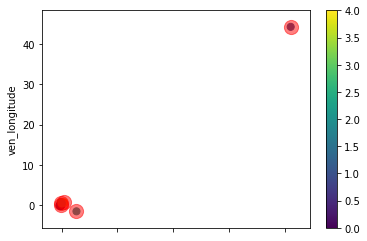

In [23]:
#cluster lat and long
kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans.fit(vendors[[ 'ven_latitude', 'ven_longitude']])
vendors['loc_cluster_label'] = kmeans.fit_predict(vendors[[ 'ven_latitude', 'ven_longitude']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(vendors[[ 'ven_latitude', 'ven_longitude']])
# Full_data['cluster_label'].value_counts()
vendors.plot.scatter(x = 'ven_latitude', y = 'ven_longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=200, alpha=0.5)

In [24]:
vendors['loc_cluster_label'].value_counts()

3    51
0    42
4     5
2     1
1     1
Name: loc_cluster_label, dtype: int64

## Vendor tags

In [25]:
pd.set_option('display.max_colwidth', 100)

In [26]:
vendors['vendor_tag_name']

0     Arabic,Breakfast,Burgers,Desserts,Free Delivery,Grills,Lebanese,Salads,Sandwiches,Shawarma
1                            Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Salads,Sandwiches,Soups
2                                                        Breakfast,Desserts,Free Delivery,Indian
3                                                                  Burgers,Desserts,Fries,Salads
4                                                                                        Burgers
                                                 ...                                            
95      American,Breakfast,Burgers,Cafe,Desserts,Free Delivery,Fries,Ice creams,Kids meal,Salads
96                                American,Burgers,Desserts,Free Delivery,Fries,Kids meal,Salads
97      American,Breakfast,Burgers,Cafe,Desserts,Free Delivery,Fries,Ice creams,Kids meal,Salads
98      American,Breakfast,Burgers,Cafe,Desserts,Free Delivery,Fries,Ice creams,Kids meal,Salads
99                            

In [27]:
vendors['vendor_tag_name']=vendors['vendor_tag_name'].astype(str)

In [28]:
def clean_text(text):
        text=re.sub("\s",'_',text)
        return text

In [29]:
def pizza_pasta(text):
    text=re.sub('[,-](Pizzas)[,-]',',Pizza,',text)
    text=re.sub('(Pizzas)[,-]','Pizza,',text)
    text=re.sub('[,-](Pizzas)',',Pizza,',text)
    text=re.sub('[,-](Pastas)[,-]',',Pasta,',text)
    return(text)

In [30]:
#sample
str='Desserts,Free Delivery'
re.sub("\s",'_' ,str)

'Desserts,Free_Delivery'

In [31]:
#sample
str='Pasta,Pastas,Juice'
re.sub('[,-](Pastas)[,-]',',Pasta,',str)

'Pasta,Pasta,Juice'

In [32]:
#sample
str='Pizzas,Pizza,Juice'
re.sub('(Pizzas)[,-]','Pizza,',str)

'Pizza,Pizza,Juice'

In [33]:
vendors['vendor_tag_name_form']=vendors['vendor_tag_name'].apply(lambda x: clean_text(x))
vendors['vendor_tag_name_form']=vendors['vendor_tag_name_form'].apply(lambda x: pizza_pasta(x))

In [34]:
print(len(vendors['vendor_tag_name_form']))
vendors['vendor_tag_name_form']

100


0     Arabic,Breakfast,Burgers,Desserts,Free_Delivery,Grills,Lebanese,Salads,Sandwiches,Shawarma
1                             Breakfast,Cakes,Crepes,Italian,Pasta,Pizza,Salads,Sandwiches,Soups
2                                                        Breakfast,Desserts,Free_Delivery,Indian
3                                                                  Burgers,Desserts,Fries,Salads
4                                                                                        Burgers
                                                 ...                                            
95      American,Breakfast,Burgers,Cafe,Desserts,Free_Delivery,Fries,Ice_creams,Kids_meal,Salads
96                                American,Burgers,Desserts,Free_Delivery,Fries,Kids_meal,Salads
97      American,Breakfast,Burgers,Cafe,Desserts,Free_Delivery,Fries,Ice_creams,Kids_meal,Salads
98      American,Breakfast,Burgers,Cafe,Desserts,Free_Delivery,Fries,Ice_creams,Kids_meal,Salads
99                            

In [35]:
count_vect = CountVectorizer() 
X_counts = count_vect.fit_transform(vendors['vendor_tag_name_form'])
print(X_counts.shape)
print(count_vect.get_feature_names())

(100, 67)
['american', 'arabic', 'asian', 'bagels', 'biryani', 'breakfast', 'burgers', 'cafe', 'cakes', 'chinese', 'churros', 'coffee', 'combos', 'crepes', 'desserts', 'dimsum', 'donuts', 'family_meal', 'fatayers', 'free_delivery', 'fresh_juices', 'fries', 'frozen_yoghurt', 'grills', 'healthy_food', 'hot_chocolate', 'hot_dogs', 'ice_creams', 'indian', 'italian', 'japanese', 'karak', 'kebabs', 'kids_meal', 'kushari', 'lebanese', 'manakeesh', 'mandazi', 'mexican', 'milkshakes', 'mishkak', 'mojitos', 'mojitos_', 'nan', 'omani', 'organic', 'pancakes', 'pasta', 'pastry', 'pizza', 'rice', 'rolls', 'salads', 'sandwiches', 'seafood', 'shawarma', 'shuwa', 'smoothies', 'soups', 'spanish_latte', 'steaks', 'sushi', 'sweets', 'thai', 'thali', 'vegetarian', 'waffles']


In [36]:
vendor_tags= pd.DataFrame(X_counts.toarray())
vendor_tags

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
96,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,1,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
98,1,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
vendor_tags.columns = count_vect.get_feature_names()
vendor_tags

,american,arabic,asian,bagels,biryani,breakfast,burgers,cafe,cakes,chinese,...,smoothies,soups,spanish_latte,steaks,sushi,sweets,thai,thali,vegetarian,waffles
0,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
96,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,1,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
98,1,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
vendors=pd.concat([vendors,vendor_tags],axis=1)

## Opening time and opening time2

###### Some records are not consistent with the majority timeformat and have NaN values.Query and replace or hardcode to make them consistent since there are just a few of those.

In [39]:
# For OpeningTime 
# 1.replace nan value with string 'timeNA'
vendors['OpeningTime'].replace(np.NaN, 'timeNA', inplace=True)

# 2. substring searched where : symbol is not present
vendors[~vendors['OpeningTime'].str.contains(':')]

# For OpeningTime2
# 1. replace nan value and '-' with string 'timeNA'
vendors['OpeningTime2'].replace(np.NaN, 'timeNA', inplace=True)
vendors['OpeningTime2'].replace('-','timeNA', inplace=True)
vendors[['vendor_id','OpeningTime','OpeningTime2']].tail(20)

,vendor_id,OpeningTime,OpeningTime2
80,537,08:00AM-11:45-,timeNA
81,547,09:00AM-11:59PM,timeNA
82,573,04:59PM-11:45PM,timeNA
83,575,10:00AM-11:45PM,timeNA
84,577,11:00AM-11:00PM,timeNA
85,578,12:00PM-11:59PM,timeNA
86,582,12:00PM-11:59PM,timeNA
87,583,00:01AM-01:00AM,09:00AM-11:59PM
88,676,9-22,timeNA
89,679,08:00AM-11:00PM,timeNA


In [40]:
# check various times when vendor opens the second time
vendors['OpeningTime2'].value_counts()

timeNA              88
00:01AM-02:30AM      3
05:00PM-11:30PM      1
01.00PM-02.00AM      1
06:30PM-11:00PM      1
12:00AM-01:00AM      1
09:00AM-11:59PM      1
05:15PM-09:30PM      1
6:10pm-12:00am       1
06:00PM-11:45PM      1
10pm-11pm            1
Name: OpeningTime2, dtype: int64

In [41]:
# For OpeningTime
# it is observed that top 4 rows dont contain ':' at all since bottom 9 values are nan
# changing the string to consistent time format
vendors['OpeningTime'].replace('9-22', '9:00AM-10:00PM', inplace=True)
vendors['OpeningTime'].replace('9am-10pm', '9:00AM-10:00PM', inplace=True)
vendors['OpeningTime'].replace('11AM-11PM', '11:00AM-11:00PM', inplace=True)

# hardcoding few other erroneous format records
vendors['OpeningTime'].replace('11:00AM-111:00PM', '11:00AM-11:00PM', inplace=True)
vendors['OpeningTime'].replace('11:30AM-11.59 PM', '11:30AM-11:59PM', inplace=True)
vendors['OpeningTime'].replace('11.30am-11:30PM', '11:30AM-11:30PM', inplace=True)
vendors['OpeningTime'].replace('01.00PM-02:.00AM', '01:00PM-02:00AM', inplace=True)
vendors['OpeningTime'].replace('08:00AM-11:45-', '08:00AM-11:45PM', inplace=True)


# For OpeningTime2
# hardcoding few erroneous format records
vendors['OpeningTime2'].replace('01.00PM-02.00AM', '01:00PM-02:00AM', inplace=True)
vendors['OpeningTime2'].replace('10pm-11pm', '10:00PM-11:00PM', inplace=True)

vendors[['vendor_id','OpeningTime','OpeningTime2']].tail(20)

,vendor_id,OpeningTime,OpeningTime2
80,537,08:00AM-11:45PM,timeNA
81,547,09:00AM-11:59PM,timeNA
82,573,04:59PM-11:45PM,timeNA
83,575,10:00AM-11:45PM,timeNA
84,577,11:00AM-11:00PM,timeNA
85,578,12:00PM-11:59PM,timeNA
86,582,12:00PM-11:59PM,timeNA
87,583,00:01AM-01:00AM,09:00AM-11:59PM
88,676,9:00AM-10:00PM,timeNA
89,679,08:00AM-11:00PM,timeNA


### Find time duration
#### Split the open and close time to seperate columns, convert string to datetime format of 12hr format to 24 hr HMS format and subract the timings to get duration in hours

In [42]:
# Find Time duration seperately for both columns

# For OpeningTime
def timediff_hour(duration):
    # get total seconds (to nanosec precision) from time difference in HMS format and divide  
    nb_hours = duration.total_seconds() / 3600 
    return nb_hours

# split the time OpeningTime     
vendors['OpenHour'] = vendors['OpeningTime'].str.split('-').str[0]
vendors['ClosedHour'] = vendors['OpeningTime'].str.split('-').str[1]

# convert time given in 12 hour AM PM format to datetime format in HMS of 24hr format
# Passing errors=’coerce’ will force an out-of-bounds date to NaT, in addition to forcing non-dates (or non-parseable dates) to NaT
vendors['OpenHour'] = pd.to_datetime(vendors['OpenHour'], errors = 'coerce').dt.strftime('%H:%M')
vendors['ClosedHour'] = pd.to_datetime(vendors['ClosedHour'], errors ='coerce').dt.strftime('%H:%M')

# subtract HMS format of open time from close time, result is in HMS
vendors['OpenDuration'] = pd.to_datetime(vendors['ClosedHour'], errors = 'coerce') - pd.to_datetime(vendors['OpenHour'], errors = 'coerce')

vendors['OpenDuration'] = vendors['OpenDuration'].apply(timediff_hour).round(2)


# For OpeningTime2
# split the time OpeningTime2     
vendors['OpenHour2'] = vendors['OpeningTime2'].str.split('-').str[0]
vendors['ClosedHour2'] = vendors['OpeningTime2'].str.split('-').str[1]

# convert time given in 12 hour AM PM format to datetime format in HMS of 24hr format
# Passing errors=’coerce’ will force an out-of-bounds date to NaT, in addition to forcing non-dates (or non-parseable dates) to NaT
vendors['OpenHour2'] = pd.to_datetime(vendors['OpenHour2'], errors = 'coerce').dt.strftime('%H:%M')
vendors['ClosedHour2'] = pd.to_datetime(vendors['ClosedHour2'], errors ='coerce').dt.strftime('%H:%M')

# subtract HMS format of open time from close time, result is in HMS
vendors['OpenDuration2'] = pd.to_datetime(vendors['ClosedHour2'], errors = 'coerce') - pd.to_datetime(vendors['OpenHour2'], errors = 'coerce')

vendors['OpenDuration2'] = vendors['OpenDuration2'].apply(timediff_hour).round(2)

vendors[['vendor_id','OpeningTime','OpenHour','ClosedHour','OpenDuration','OpeningTime2','OpenHour2','ClosedHour2','OpenDuration2']].head(10)

,vendor_id,OpeningTime,OpenHour,ClosedHour,OpenDuration,OpeningTime2,OpenHour2,ClosedHour2,OpenDuration2
0,4,11:00AM-11:30PM,11:00,23:30,12.50,timeNA,NaN,NaN,NaN
1,13,08:30AM-10:30PM,08:30,22:30,14.00,timeNA,NaN,NaN,NaN
2,20,08:00AM-10:45PM,08:00,22:45,14.75,timeNA,NaN,NaN,NaN
3,23,10:59AM-10:30PM,10:59,22:30,11.52,timeNA,NaN,NaN,NaN
4,28,11:00AM-11:45PM,11:00,23:45,12.75,timeNA,NaN,NaN,NaN
5,33,11:00AM-10:30PM,11:00,22:30,11.50,timeNA,NaN,NaN,NaN
6,43,11:00AM-11:45PM,11:00,23:45,12.75,timeNA,NaN,NaN,NaN
7,44,11:00AM-11:45PM,11:00,23:45,12.75,timeNA,NaN,NaN,NaN
8,55,09:00AM-11:30PM,09:00,23:30,14.50,timeNA,NaN,NaN,NaN
9,66,05:00PM-11:00PM,17:00,23:00,6.00,timeNA,NaN,NaN,NaN


In [43]:
# Find total duration when vendor is open
# replace nan values with 0 to calculate total duration
vendors['OpenDuration']=vendors['OpenDuration'].replace(np.nan,0)
vendors['OpenDuration2']=vendors['OpenDuration2'].replace(np.nan,0)

# Add the columns of duration to get total
vendors['TotOpenDuration']=vendors['OpenDuration']+vendors['OpenDuration2']
vendors[['vendor_id','OpeningTime','OpeningTime2','OpenDuration','OpenDuration2','TotOpenDuration']].head(15)

,vendor_id,OpeningTime,OpeningTime2,OpenDuration,OpenDuration2,TotOpenDuration
0,4,11:00AM-11:30PM,timeNA,12.50,0.0,12.50
1,13,08:30AM-10:30PM,timeNA,14.00,0.0,14.00
2,20,08:00AM-10:45PM,timeNA,14.75,0.0,14.75
3,23,10:59AM-10:30PM,timeNA,11.52,0.0,11.52
4,28,11:00AM-11:45PM,timeNA,12.75,0.0,12.75
5,33,11:00AM-10:30PM,timeNA,11.50,0.0,11.50
6,43,11:00AM-11:45PM,timeNA,12.75,0.0,12.75
7,44,11:00AM-11:45PM,timeNA,12.75,0.0,12.75
8,55,09:00AM-11:30PM,timeNA,14.50,0.0,14.50
9,66,05:00PM-11:00PM,timeNA,6.00,0.0,6.00


### Lets categorize open timing

In [44]:
# Extract hours from OpenHour and convert to int
vendors['Open'] = pd.to_datetime(vendors['OpenHour'], errors = 'coerce').dt.strftime('%H')
# For int need convert NaT to some value e.g. 25 and then cast to int:
vendors['Open'] = pd.to_numeric(vendors['Open'], errors='coerce').fillna(25).astype(np.int64) 
vendors[['vendor_id','OpeningTime','OpenHour','ClosedHour','OpenDuration','Open']]

# make categories based on opening hours early, normal, evening, latenight, na
vendors['timegroup'] = np.nan
vendors.loc[(vendors.Open >=5)&(vendors.Open <11),'timegroup']='early(5-10.59am)'
vendors.loc[(vendors.Open >=11)&(vendors.Open <17),'timegroup']='normal(11-16.59pm)'
vendors.loc[(vendors.Open >=17)&(vendors.Open <=23),'timegroup']='evening(17-22.59pm)'
vendors.loc[((vendors.Open >=0)&(vendors.Open <5))|(vendors.Open ==23) ,'timegroup']='latenight(23-4.59am)'
vendors.drop(['Open'], axis=1, inplace = True)
vendors[['vendor_id','OpeningTime','OpenHour','ClosedHour','OpenDuration','timegroup']]

,vendor_id,OpeningTime,OpenHour,ClosedHour,OpenDuration,timegroup
0,4,11:00AM-11:30PM,11:00,23:30,12.50,normal(11-16.59pm)
1,13,08:30AM-10:30PM,08:30,22:30,14.00,early(5-10.59am)
2,20,08:00AM-10:45PM,08:00,22:45,14.75,early(5-10.59am)
3,23,10:59AM-10:30PM,10:59,22:30,11.52,early(5-10.59am)
4,28,11:00AM-11:45PM,11:00,23:45,12.75,normal(11-16.59pm)
...,...,...,...,...,...,...
95,849,timeNA,NaN,NaN,0.00,NaN
96,855,timeNA,NaN,NaN,0.00,NaN
97,856,timeNA,NaN,NaN,0.00,NaN
98,858,timeNA,NaN,NaN,0.00,NaN


In [45]:
# Drop irrelevant columns
vendors.drop(['OpenDuration','OpenDuration2','ClosedHour','OpenHour2','ClosedHour2',], axis=1,inplace=True)

In [46]:
# Final Output - TotalTimeDuration and time group based on open hours
vendors[['vendor_id','OpeningTime','OpenHour','TotOpenDuration','timegroup']]

,vendor_id,OpeningTime,OpenHour,TotOpenDuration,timegroup
0,4,11:00AM-11:30PM,11:00,12.50,normal(11-16.59pm)
1,13,08:30AM-10:30PM,08:30,14.00,early(5-10.59am)
2,20,08:00AM-10:45PM,08:00,14.75,early(5-10.59am)
3,23,10:59AM-10:30PM,10:59,11.52,early(5-10.59am)
4,28,11:00AM-11:45PM,11:00,12.75,normal(11-16.59pm)
...,...,...,...,...,...
95,849,timeNA,NaN,0.00,NaN
96,855,timeNA,NaN,0.00,NaN
97,856,timeNA,NaN,0.00,NaN
98,858,timeNA,NaN,0.00,NaN


In [47]:
vendors['timegroup'].value_counts()

early(5-10.59am)        47
normal(11-16.59pm)      37
evening(17-22.59pm)      6
latenight(23-4.59am)     1
Name: timegroup, dtype: int64

## Categorical variable- creating dummy vars (Not dropping any)

In [48]:
VenCatDummy = pd.get_dummies(vendors['vendor_category_en'], prefix = 'vendor_category_en') 
deviceDummy=pd.get_dummies(vendors['device_type'],prefix='device_type')
timegroupDummy=pd.get_dummies(vendors['timegroup'],prefix='timegroup')
locationDummy=pd.get_dummies(vendors['loc_cluster_label'],prefix='ven_lan_long')
del vendors['loc_cluster_label']
del vendors['vendor_category_en'] #deleteing original columns
del vendors['device_type'] 
del vendors['timegroup']
vendors = pd.concat([vendors,VenCatDummy,deviceDummy,timegroupDummy], axis=1)
vendors.columns.values

array(['vendor_id', 'authentication_id', 'ven_latitude', 'ven_longitude',
       'vendor_category_id', 'delivery_charge', 'serving_distance',
       'is_open', 'OpeningTime', 'OpeningTime2', 'prepration_time',
       'commission', 'is_akeed_delivering', 'discount_percentage',
       'ven_status', 'ven_verified', 'rank', 'language', 'vendor_rating',
       'sunday_from_time1', 'sunday_to_time1', 'sunday_from_time2',
       'sunday_to_time2', 'monday_from_time1', 'monday_to_time1',
       'monday_from_time2', 'monday_to_time2', 'tuesday_from_time1',
       'tuesday_to_time1', 'tuesday_from_time2', 'tuesday_to_time2',
       'wednesday_from_time1', 'wednesday_to_time1',
       'wednesday_from_time2', 'wednesday_to_time2',
       'thursday_from_time1', 'thursday_to_time1', 'thursday_from_time2',
       'thursday_to_time2', 'friday_from_time1', 'friday_to_time1',
       'friday_from_time2', 'friday_to_time2', 'saturday_from_time1',
       'saturday_to_time1', 'saturday_from_time2', 'saturda

## Dropping unwanted columns

In [49]:
#Dropping unwanted columns
vendors.drop(['OpeningTime' ,'OpeningTime2','display_orders','ven_created_at','ven_latitude','ven_longitude','Date_ven_created_at','one_click_vendor', 'ven_country_id',
       'ven_city_id','vendor_category_id','primary_tags', 'open_close_flags',
        'vendor_tag','language','is_akeed_delivering','rank','commission','authentication_id','sunday_from_time1',
       'sunday_to_time1', 'sunday_from_time2', 'sunday_to_time2',
       'monday_from_time1','vendor_tag_name','monday_to_time1', 'monday_from_time2',
       'monday_to_time2', 'tuesday_from_time1', 'tuesday_to_time1',
       'tuesday_from_time2', 'tuesday_to_time2', 'wednesday_from_time1',
       'wednesday_to_time1', 'wednesday_from_time2', 'wednesday_to_time2',
       'thursday_from_time1', 'thursday_to_time1', 'thursday_from_time2',
       'thursday_to_time2', 'friday_from_time1', 'friday_to_time1',
       'friday_from_time2', 'friday_to_time2', 'saturday_from_time1',
       'saturday_to_time1', 'saturday_from_time2','vendor_tag_name_form','saturday_to_time2','ven_updated_at'],inplace=True,axis=1)

In [50]:
print(vendors.columns.values)
vendors

['vendor_id' 'delivery_charge' 'serving_distance' 'is_open'
 'prepration_time' 'discount_percentage' 'ven_status' 'ven_verified'
 'vendor_rating' 'Ven_created_days' 'american' 'arabic' 'asian' 'bagels'
 'biryani' 'breakfast' 'burgers' 'cafe' 'cakes' 'chinese' 'churros'
 'coffee' 'combos' 'crepes' 'desserts' 'dimsum' 'donuts' 'family_meal'
 'fatayers' 'free_delivery' 'fresh_juices' 'fries' 'frozen_yoghurt'
 'grills' 'healthy_food' 'hot_chocolate' 'hot_dogs' 'ice_creams' 'indian'
 'italian' 'japanese' 'karak' 'kebabs' 'kids_meal' 'kushari' 'lebanese'
 'manakeesh' 'mandazi' 'mexican' 'milkshakes' 'mishkak' 'mojitos'
 'mojitos_' 'nan' 'omani' 'organic' 'pancakes' 'pasta' 'pastry' 'pizza'
 'rice' 'rolls' 'salads' 'sandwiches' 'seafood' 'shawarma' 'shuwa'
 'smoothies' 'soups' 'spanish_latte' 'steaks' 'sushi' 'sweets' 'thai'
 'thali' 'vegetarian' 'waffles' 'OpenHour' 'TotOpenDuration'
 'vendor_category_en_Restaurants' 'vendor_category_en_Sweets & Bakes'
 'device_type_1' 'device_type_3' 'timeg

,vendor_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,ven_status,ven_verified,vendor_rating,Ven_created_days,...,OpenHour,TotOpenDuration,vendor_category_en_Restaurants,vendor_category_en_Sweets & Bakes,device_type_1,device_type_3,timegroup_early(5-10.59am),timegroup_evening(17-22.59pm),timegroup_latenight(23-4.59am),timegroup_normal(11-16.59pm)
0,4,0.0,6.0,1.0,15,0.0,1.0,1,4.4,883,...,11:00,12.50,1,0,0,1,0,0,0,1
1,13,0.7,5.0,1.0,14,0.0,1.0,1,4.7,790,...,08:30,14.00,1,0,0,1,1,0,0,0
2,20,0.0,8.0,1.0,19,0.0,1.0,1,4.5,789,...,08:00,14.75,1,0,0,1,1,0,0,0
3,23,0.0,5.0,1.0,16,0.0,1.0,1,4.5,787,...,10:59,11.52,1,0,0,1,1,0,0,0
4,28,0.7,15.0,1.0,10,0.0,1.0,1,4.4,776,...,11:00,12.75,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,849,0.0,10.0,1.0,10,0.0,1.0,1,4.1,193,...,NaN,0.00,1,0,0,1,0,0,0,0
96,855,0.0,8.0,1.0,10,0.0,1.0,1,4.2,193,...,NaN,0.00,1,0,0,1,0,0,0,0
97,856,0.0,7.0,1.0,10,0.0,1.0,1,4.3,193,...,NaN,0.00,1,0,0,1,0,0,0,0
98,858,0.0,3.0,1.0,10,0.0,1.0,1,4.2,193,...,NaN,0.00,1,0,0,1,0,0,0,0


In [51]:
#convert to csv file
vendors.to_csv("vendors_p1.csv",index=False)